# About:
- this notebook visualizes the EM, f1, train loss and validation loss of roberta-base during fine-tuning over 5 epochs

In [1]:
import pandas as pd
results_df = pd.read_pickle(r"C:\Users\tanch\Documents\GitHub\URECA-CovidQA-Research\Research\RAM\fine tuning on covidQA results.pkl")
results_long_df = pd.melt(results_df, 
                        id_vars = "batch", 
                        value_vars = ['EM', 'f1', 'val_loss', 'train_loss'],
                        var_name = "metrics",
                        value_name = "value")
results_long_df

,batch,metrics,value
0,10,EM,0.464789
1,20,EM,0.408451
2,30,EM,0.295775
3,40,EM,0.253521
4,50,EM,0.422535
...,...,...,...
727,1790,train_loss,0.000100
728,1800,train_loss,0.000100
729,1810,train_loss,0.000100
730,1820,train_loss,0.000400


In [3]:
import seaborn as sb
sb.set_palette("Dark2")

[Text(0.5, 1.0, 'F-1 score on CovidQA Validation Set'), Text(0, 0.5, 'Score')]

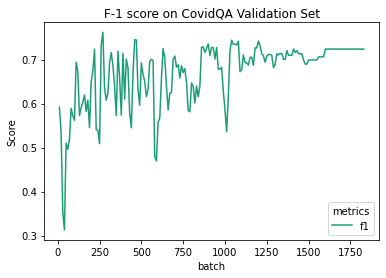

In [5]:
plot_data = results_long_df[results_long_df.metrics.isin(["f1"])]#[results_long_df.batch<=800]
sb.lineplot(data = plot_data, 
            x = "batch",
            y ="value",
            hue = "metrics").set(title = "F-1 score on CovidQA Validation Set",ylabel = "Score")

[Text(0.5, 1.0, 'Validation loss on CovidQA Validation Set'),
 Text(0, 0.5, 'Loss')]

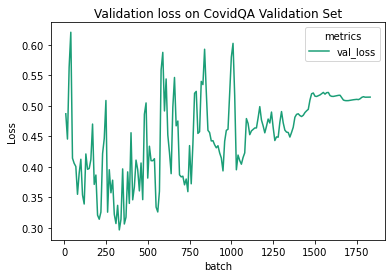

In [80]:
plot_data = results_long_df[results_long_df.metrics.isin(['val_loss'])]#[results_long_df.batch<=800]
sb.lineplot(data = plot_data, 
            x = "batch",
            y ="value",
            palette = [sb.color_palette("Dark2")[0]],
            hue = "metrics").set(title = "Validation loss on CovidQA Validation Set",ylabel = "Loss")

[Text(0.5, 1.0, 'Training loss on CovidQA Training Set'), Text(0, 0.5, 'Loss')]

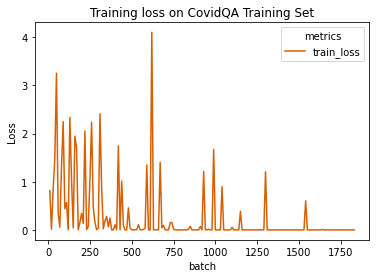

In [6]:
plot_data = results_long_df[results_long_df.metrics.isin(['train_loss'])]#[results_long_df.batch<=800]
sb.lineplot(data = plot_data, 
            x = "batch",
            y ="value",
            palette = [sb.color_palette("Dark2")[1]],
            hue = "metrics").set(title = "Training loss on CovidQA Training Set",ylabel = "Loss")